# Importing Packages

In [1]:
import sys
!{sys.executable} -m pip install astropy
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scipy
from scipy import optimize
from astropy.io import fits
from astropy.table import Table
from scipy import interpolate
%matplotlib inline
from matplotlib.patches import Rectangle


np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision = 40, suppress = True) #prevents scientific notation for 40 character numbers

/opt/anaconda3/envs/Git_JupyterLab/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
### Read in data file

low_vtan_sample = fits.open('/Users/edm/Library/CloudStorage/Dropbox/Data/Everett_BD_Sample_for_flybys_sheet.fits')
low_vtan = Table(low_vtan_sample[1].data)

In [3]:
low_vtan

name,plx_formula,plxerr_formula,ref_plx_formula,pmra_formula,pmraerr_formula,pmdec_formula,pmdecerr_formula,ref_pm_formula,ra_j2000_formula,dec_j2000_formula,source_j2000_formula,SpT,PMTOT,Distance,Vtan
str28,float32,float32,str15,float32,float32,float32,float32,str7,float64,float32,str7,float32,float64,float64,float64
ULAS J131705.66+091016.9,3.8,0.7,DR2,-64.6,1.4,-379.7,0.8,DR2,199.2736,9.1717,DR2,-7.0,385.1561372,263.1578947,480.4316027
ULAS J033350.84+001406.1,8.6,0.7,DR2,772.1,0.9,-65.7,1.0,DR2,53.4614,0.2351,DR2,-10.0,774.8902503,116.2790698,427.0906728
ULAS J121508.37+040200.5,3.0,4.0,DR2,99.0,4.0,-246.0,2.4,DR2,183.7848,4.0336,DR2,-7.0,265.1735281,333.3333333,418.9741744
LHS 1265,7.2,0.19,DR2,-123.6,0.4,-587.6,0.19,DR2,23.7465,-9.0784,DR2,-9.5,600.458758,138.8888889,395.3020157
WISEA J020201.25-313645.2,15.1,0.3,DR2,-155.1,0.5,-1152.4,0.4,DR2,30.5058,-31.6091,DR2,-10.0,1162.79051,66.22516556,365.0084117
LEHPM 1-3365,8.18,0.29,DR2,625.0,0.4,38.38,0.3,DR2,52.6632,-23.8128,DR2,-7.0,626.1773107,122.2493888,362.8460211
WISEA J204027.30+695924.1,30.3,0.13,DR2,1558.38,0.28,1697.36,0.25,DR2,310.1004,69.985,DR2,-10.0,2304.252415,33.00330033,360.4672095
VVV J12564163-6202039,14.9,1.7,DR2,-1130.0,3.0,21.3,2.6,DR2,194.1814,-62.0345,DR2,-13.0,1130.20073,67.11409396,359.5403664
WISEA J001450.17-083823.4,20.14,0.28,DR2,1477.2,0.6,-257.96,0.28,DR2,3.7046,-8.639,DR2,-10.0,1499.554334,49.65243297,352.9239099


## Random Radial Velocity Distribution

In [135]:
Rvel = np.random.rand(1827)*100

In [136]:
Rvel

array([69.93606026122654   , 66.32598040318615   ,  0.6763042149405707 ,
       90.77281441476504   , 57.14930867492342   , 67.51149276615742   ,
       52.03719188001767   , 14.953362838142192  , 64.59020128677062   ,
       78.33687500343662   , 13.556899012681466  , 88.17387298232305   ,
       92.16794276375651   , 11.19643624007992   , 18.275269037600605  ,
       54.58026955573584   , 68.67301035990612   , 50.29340917061857   ,
       88.48122936847105   , 42.68763445169118   , 62.593301055957085  ,
       81.48623352274733   , 43.39289563117862   , 19.376413344528874  ,
       39.420827260853144  , 49.83155295033268   , 88.55356263194885   ,
       43.780927271898776  , 15.802896292135094  , 47.35131827239562   ,
       55.51821036406258   , 23.226266119992466  , 52.29105498814327   ,
       61.22181074679136   , 85.11349486929836   , 92.86132861077101   ,
       53.75627185679437   , 48.44606017689404   , 88.10716600107203   ,
        5.514499246189331  , 78.12854464100948   , 

Checking to see the distribution of values in the Rvel array

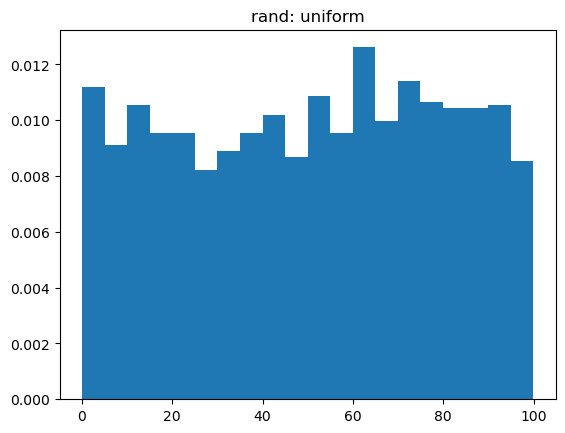

In [144]:
pdf, bins, patches = plt.hist(Rvel, bins=20, density=True)
plt.title('rand: uniform')
plt.show()

## Perihelion time/distance Calculation

In [138]:
## pull out variables on interest

#source name
name = np.asarray(low_vtan['name'])

#radial velocity
rv = -Rvel

# Kinematic values
Pmtot = np.asarray(low_vtan['PMTOT'])
Vtan = np.asarray(low_vtan['Vtan'])
plx = np.asarray(low_vtan['plx_formula'])
vtot = (np.sqrt(Vtan**2+Rvel**2))

In [139]:
c1 = 0.9779*10**9
c2 = 4.74047

t = (-c1*(1/plx)*(rv/vtot**2))
d = 10**3*(1/plx)*(Vtan/vtot)

## Plot of Flybys

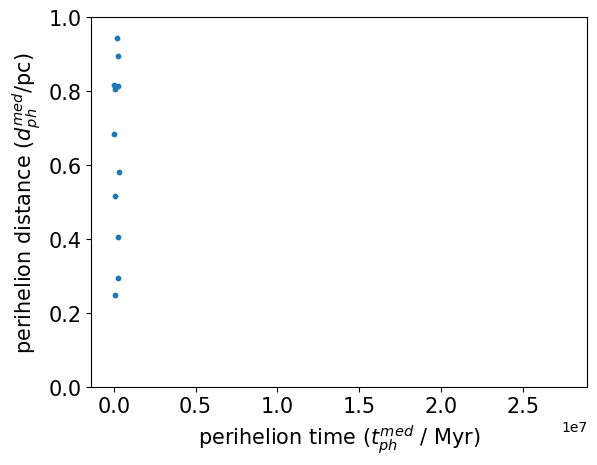

In [140]:
plt.scatter(t,d, 10)

#xmin, xmax = plt.xlim(0,5)
ymin, ymax = plt.ylim(0,1)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

In [141]:
minnum = np.argmin(t)

In [142]:
name[minnum]

'WISE J043052.92+463331.6'

In [143]:
low_vtan[minnum]

name,plx_formula,plxerr_formula,ref_plx_formula,pmra_formula,pmraerr_formula,pmdec_formula,pmdecerr_formula,ref_pm_formula,ra_j2000_formula,dec_j2000_formula,source_j2000_formula,SpT,PMTOT,Distance,Vtan
str28,float32,float32,str15,float32,float32,float32,float32,str7,float64,float32,str7,float32,float64,float64,float64
WISE J043052.92+463331.6,81.0,4.0,Best20a,879.7,2.3,383.8,2.2,Kirk19,67.7207,46.5588,AllWISE,28.0,959.7783755,12.34567901,56.16480864
